In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data[:, :2]  # 첫 두 개의 특성 선택
y = (iris.target == 0).astype(int)  # Setosa vs Non-setosa

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
class LogisticRegression:
  def __init__(self, learning_rate=0.001, num_iter=1000):
    self.learning_rate = learning_rate
    self.num_iter = num_iter
    self.theta = None

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    self.theta = np.zeros(X_b.shape[1])

    for _ in range(self.num_iter):
      z = X_b.dot(self.theta)
      predictions = self.sigmoid(z)
      # 경량화된 경사 하강법
      gradient = X_b.T.dot(predictions - y) / y.size
      self.theta -= self.learning_rate * gradient

  def predict(self, X):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    z = X_b.dot(self.theta)
    prediction = self.sigmoid(z)
    return (prediction >= .5).astype(int)



In [ ]:
# 모델 생성 및 학습
model = LogisticRegression(learning_rate=0.1, num_iter=3000)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = np.mean(y_pred == y_test)
print(f'정확도: {accuracy:.2f}')

# 혼동 행렬 계산
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'혼동 행렬:\n{conf_matrix}')


정확도: 1.00
혼동 행렬:
[[20  0]
 [ 0 10]]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


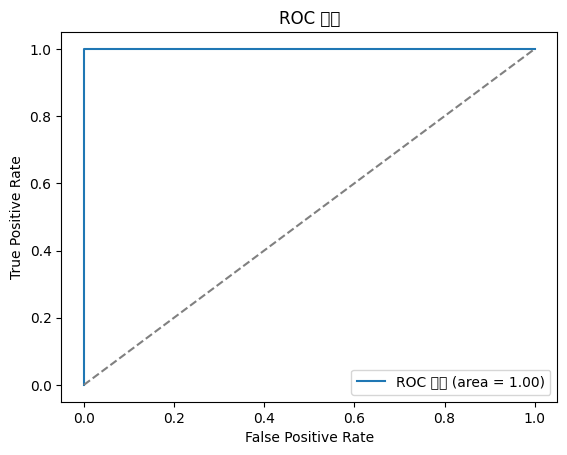

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 계산
y_scores = model.sigmoid(np.c_[np.ones((X_test.shape[0], 1)), X_test].dot(model.theta))  # 양성 클래스에 대한 확률
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, label=f'ROC 곡선 (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC 곡선')
plt.legend()
plt.show()


# Torch

In [ ]:

!pip install torch --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 741.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 752.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data[:, :2]  # 첫 두 개의 특성 선택
y = (iris.target == 0).astype(int)  # Setosa vs Non-setosa

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = torch.tensor(scaler_x.fit_transform(X_train), dtype=torch.float32)
y_train = torch.tensor(scaler_y.fit_transform(y_train.reshape(-1, 1)), dtype=torch.float32)
x_test = torch.tensor(scaler_x.transform(X_test), dtype=torch.float32)
y_test = torch.tensor(scaler_y.transform(y_test.reshape(-1, 1)), dtype=torch.float32)


y_train = (y_train > 0).float()  # 0보다 큰 값은 1, 나머지는 0으로 변환
y_test = (y_test > 0).float()

x_train.size(), y_train.size(), x_test.size(), y_test.size()

(torch.Size([120, 2]),
 torch.Size([120, 1]),
 torch.Size([30, 2]),
 torch.Size([30, 1]))

In [ ]:
import torch
import torch.nn as nn

class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, 1)

  def forward(self, x):
    return torch.sigmoid(self.linear(x))

In [ ]:
input_dim = x_train.size()[1]
model = LogisticRegressionModel(input_dim)

In [ ]:
# 손실 함수 및 옵티마이저 정의
criterion = nn.BCELoss()  # 이진 교차 엔트로피 손실
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 2000
for epoch in range(num_epochs):

  y_pred = model(x_train)
  loss = criterion(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [200/2000], Loss: 0.3906
Epoch [400/2000], Loss: 0.2863
Epoch [600/2000], Loss: 0.2305
Epoch [800/2000], Loss: 0.1959
Epoch [1000/2000], Loss: 0.1722
Epoch [1200/2000], Loss: 0.1549
Epoch [1400/2000], Loss: 0.1416
Epoch [1600/2000], Loss: 0.1310
Epoch [1800/2000], Loss: 0.1224
Epoch [2000/2000], Loss: 0.1152


In [ ]:
model.eval()  # 평가 모드로 전환
with torch.no_grad():
    y_test_pred = model(x_test)
    test_loss = criterion(y_test_pred, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 0.1086
